<a href="https://colab.research.google.com/github/cxbxmxcx/Practical_AI_on_GCP/blob/master/Chapter_10_EatNoEat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/cxbxmxcx/EatNoEat.git

Cloning into 'EatNoEat'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 182 (delta 80), reused 131 (delta 49), pack-reused 0
Receiving objects: 100% (182/182), 1.95 MiB | 6.01 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
%cd EatNoEat/

/content/EatNoEat


In [ ]:
import drive as d

drive, images, training = d.mount_drive()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
print(drive, images, training)

/content/gdrive/My Drive/ /content/gdrive/My Drive/TestImages/ /content/gdrive/My Drive/Traning/


In [ ]:
import dqn_agent as agent

dqn = agent.train_dqn(training)

[(array([[ 0.4596829 , -0.6870861 ,  0.53766775]], dtype=float32), 1, '/content/gdrive/My Drive/TestImages/french_toast.jpg'), (array([[-0.97074133, -0.6522383 ,  1.1434978 ]], dtype=float32), 1, '/content/gdrive/My Drive/TestImages/pizza.jpg'), (array([[ 1.7253977, -1.5786446,  1.4484838]], dtype=float32), 0, '/content/gdrive/My Drive/TestImages/bip.jpg'), (array([[-1.6101956,  1.4084429,  1.4795756]], dtype=float32), 1, '/content/gdrive/My Drive/TestImages/poutine.jpg'), (array([[ 0.3746992 , -0.96197677,  1.1125895 ]], dtype=float32), 1, '/content/gdrive/My Drive/TestImages/hot_dog.jpg'), (array([[-2.0631292,  2.5932405,  0.7647727]], dtype=float32), 1, '/content/gdrive/My Drive/TestImages/apple_pie.jpg'), (array([[ 1.9650922, -1.8086189,  2.7251496]], dtype=float32), 0, '/content/gdrive/My Drive/TestImages/ramen.jpg'), (array([[-1.577625  ,  1.9875807 ,  0.24496809]], dtype=float32), 1, '/content/gdrive/My Drive/TestImages/hamburger.jpg'), (array([[ 4.1403537, -3.6440444,  2.382199

In [ ]:
import tensorflow as tf
import numpy as np
import nutritionist as n

models = drive + 'Models'
print(models)
x, _ = n.load_image("apple_pie.jpg")
img = x[np.newaxis, ...]

nutritionist = n.create_model(img)
nutritionist.summary()
latest = tf.train.latest_checkpoint(models)

if latest != None:
  nutritionist.load_weights(latest)

/content/gdrive/My Drive/Models
219062272/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 4611      
Total params: 54,341,347
Trainable params: 54,280,803
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
print(n.observe_image("apple_pie.jpg", nutritionist)+5)

[[2.936872  7.593239  5.7647734]]


<IPython.core.display.Javascript object>

Label(value='Suggested -> No Eat')

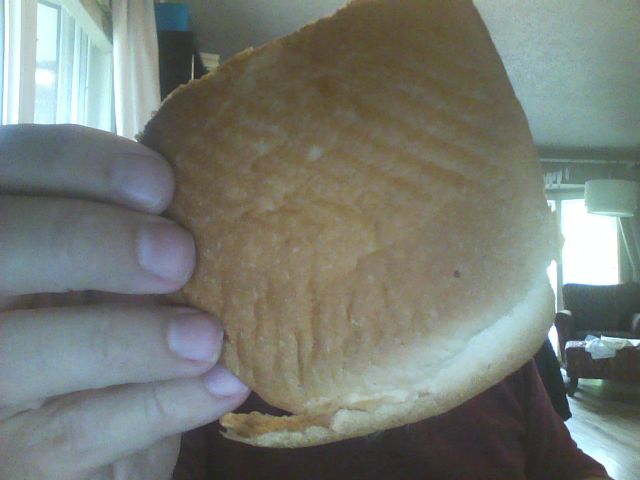

In [ ]:
import webcam as wc
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image
 
try:
  filename = wc.take_photo()
  state = n.observe_image(filename, nutritionist)
  action = dqn.action(state)
  eat = "Eat" if action ==0 else "No Eat"
  val = f"Suggested -> {eat}"
  label = widgets.Label(
    value= val,    
    disabled=False
  )
  display(label)
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))